# Arrays and Plotting Practice

Let's get just a little practice dealing with numpy arrays and with plotting data. We start by importing data from a csv file the way that we already know how, using the `csv` package. 


In [5]:
import csv

allrows = []


with open('../../datasets/behavioral.csv','r') as f: #open the file
    csvreader = csv.reader(f,delimiter=',') #create our csv reader "machine"
    
    for row in csvreader: #loop through all rows
        allrows.append(row) #append to our list

#now we print the first 10 rows 1 at a time (this formats more nicely than print allrows[:10])

for i in allrows[:10]:
    print i



['ID', 'Block', 'Trial', 'Task', 'Accuracy', 'RT']
['801', '1', '1', '2', '1', '1752.04']
['801', '1', '2', '2', '1', '823.718']
['801', '1', '3', '2', '1', '646.493']
['801', '1', '4', '2', '1', '592.449']
['801', '1', '5', '2', '1', '679.79']
['801', '1', '6', '2', '1', '761.609']
['801', '1', '7', '2', '0', '555.387']
['801', '1', '8', '2', '1', '1020.5']
['801', '1', '9', '2', '1', '1090.44']


This is a set of behavioral data from an experiment in our lab. You should open the file with Excel to see what it looks like. Notice we have 6 columns, and they're all numbers. BUT, notice that all the numbers have little quotes around them. `csv.reader` converted everything to a string. So we have to convert it all to `int` or `float` in order to do any math with this. Notice that each row of the data is a separate list too. We we want to get all the RTs, we would have to loop, like this: 

```python
allRT = []

for i in allrows:
    allRT.append(float(i[5]))
    
#OR with list comprehension
allRT = [float(i[5]) for i in allrows]
```

This is doable, but clunky. Our ultimate goal is to get the average RT for each Task and to produce some plots in the process. Having this organization is not ideal for that goal. `Numpy` arrays to the rescue!

First we read in the *same file* straight into a numpy array using the `genfromtxt` method, like this: 

In [6]:
import numpy as np #get used to renaming it to "np"

alldata = np.genfromtxt('../../datasets/behavioral.csv',delimiter=',') #read csv file as a numpy array

print type(alldata)
print alldata.shape #how many (rows, columns)?

<type 'numpy.ndarray'>
(12801, 6)


Notice we have produced a numpy array, and if we look at `alldata.shape` it has 12,801 rows and 6 columns. Let's start by printing the first 10 rows of `alldata`

In [7]:
print alldata[:10,:] #notice the second colon, which means "all columns"

[[             nan              nan              nan              nan
               nan              nan]
 [  8.01000000e+02   1.00000000e+00   1.00000000e+00   2.00000000e+00
    1.00000000e+00   1.75204000e+03]
 [  8.01000000e+02   1.00000000e+00   2.00000000e+00   2.00000000e+00
    1.00000000e+00   8.23718000e+02]
 [  8.01000000e+02   1.00000000e+00   3.00000000e+00   2.00000000e+00
    1.00000000e+00   6.46493000e+02]
 [  8.01000000e+02   1.00000000e+00   4.00000000e+00   2.00000000e+00
    1.00000000e+00   5.92449000e+02]
 [  8.01000000e+02   1.00000000e+00   5.00000000e+00   2.00000000e+00
    1.00000000e+00   6.79790000e+02]
 [  8.01000000e+02   1.00000000e+00   6.00000000e+00   2.00000000e+00
    1.00000000e+00   7.61609000e+02]
 [  8.01000000e+02   1.00000000e+00   7.00000000e+00   2.00000000e+00
    0.00000000e+00   5.55387000e+02]
 [  8.01000000e+02   1.00000000e+00   8.00000000e+00   2.00000000e+00
    1.00000000e+00   1.02050000e+03]
 [  8.01000000e+02   1.00000000e+00  

Why are those `nan` things there? In numpy, `nan` is a special value that means "not a number", but you should think of it as "missing data". Why is the first row missing data? If we look at the file in Excel, or when we read it in using `csv.reader`, there is a header at the top of the file (the column names). Numpy arrays are for holding numerical data. When it tries to read in that first row, it cannot convert the text (like "ID","Block") into a number, so it fills in missing data instead. 

We want to tell numpy to skip the first header row, since it does not contain numerical data.

Use the argument `skip_header=1` to tell `np.genfromtxt` to skip the first row. You can see the full documentation here: http://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html . Note: if we put a higher number, then we can skip as many rows as we want, not just the first one. 

Print the first 10 rows again. 

In [8]:
alldata = np.genfromtxt('../../datasets/behavioral.csv',delimiter=',',skip_header=1) #read csv file as a numpy array

print type(alldata)
print alldata.shape #how many (rows, columns)?

<type 'numpy.ndarray'>
(12800, 6)


The column names are helpful for us, though. Here is a list of the column names, so you know what each one is. You don't *have* to use this variable in the following problems, it's just listed here in case you need it. 

In [9]:
column_names = ['ID','Block','Trial','Task','Accuracy','RT']

### Basic Indexing

Time to practice indexing. Notice we can grab entire columns of data without looping now. Make python print the following: 

* a. The first 20 rows of the RT column
* b. The last 20 rows of the Block column
* c. The first 50 rows of the first 3 columns (ID, Block, Trial)
* d. The first 20 rows of the columns: ID, Block, and RT

In [10]:
#a

print alldata[:20,5]


[ 1752.04    823.718   646.493   592.449   679.79    761.609   555.387
  1020.5    1090.44   2086.91    688.475   682.268  1228.09    964.625
   832.73    692.578   929.221   642.677   775.196   691.337]


In [11]:
#b

print alldata[-20:,1]

[ 32.  32.  32.  32.  32.  32.  32.  32.  32.  32.  32.  32.  32.  32.  32.
  32.  32.  32.  32.  32.]


In [12]:
#c

print alldata[:50,[0,1,2]]


[[ 801.    1.    1.]
 [ 801.    1.    2.]
 [ 801.    1.    3.]
 [ 801.    1.    4.]
 [ 801.    1.    5.]
 [ 801.    1.    6.]
 [ 801.    1.    7.]
 [ 801.    1.    8.]
 [ 801.    1.    9.]
 [ 801.    1.   10.]
 [ 801.    1.   11.]
 [ 801.    1.   12.]
 [ 801.    1.   13.]
 [ 801.    1.   14.]
 [ 801.    1.   15.]
 [ 801.    1.   16.]
 [ 801.    1.   17.]
 [ 801.    1.   18.]
 [ 801.    1.   19.]
 [ 801.    1.   20.]
 [ 801.    2.    1.]
 [ 801.    2.    2.]
 [ 801.    2.    3.]
 [ 801.    2.    4.]
 [ 801.    2.    5.]
 [ 801.    2.    6.]
 [ 801.    2.    7.]
 [ 801.    2.    8.]
 [ 801.    2.    9.]
 [ 801.    2.   10.]
 [ 801.    2.   11.]
 [ 801.    2.   12.]
 [ 801.    2.   13.]
 [ 801.    2.   14.]
 [ 801.    2.   15.]
 [ 801.    2.   16.]
 [ 801.    2.   17.]
 [ 801.    2.   18.]
 [ 801.    2.   19.]
 [ 801.    2.   20.]
 [ 801.    3.    1.]
 [ 801.    3.    2.]
 [ 801.    3.    3.]
 [ 801.    3.    4.]
 [ 801.    3.    5.]
 [ 801.    3.    6.]
 [ 801.    3.    7.]
 [ 801.    3.

In [13]:
#d

alldata[:20,[0,1,5]]

array([[  8.01000000e+02,   1.00000000e+00,   1.75204000e+03],
       [  8.01000000e+02,   1.00000000e+00,   8.23718000e+02],
       [  8.01000000e+02,   1.00000000e+00,   6.46493000e+02],
       [  8.01000000e+02,   1.00000000e+00,   5.92449000e+02],
       [  8.01000000e+02,   1.00000000e+00,   6.79790000e+02],
       [  8.01000000e+02,   1.00000000e+00,   7.61609000e+02],
       [  8.01000000e+02,   1.00000000e+00,   5.55387000e+02],
       [  8.01000000e+02,   1.00000000e+00,   1.02050000e+03],
       [  8.01000000e+02,   1.00000000e+00,   1.09044000e+03],
       [  8.01000000e+02,   1.00000000e+00,   2.08691000e+03],
       [  8.01000000e+02,   1.00000000e+00,   6.88475000e+02],
       [  8.01000000e+02,   1.00000000e+00,   6.82268000e+02],
       [  8.01000000e+02,   1.00000000e+00,   1.22809000e+03],
       [  8.01000000e+02,   1.00000000e+00,   9.64625000e+02],
       [  8.01000000e+02,   1.00000000e+00,   8.32730000e+02],
       [  8.01000000e+02,   1.00000000e+00,   6.9257800

### Boolean Indexing

Now let's practice boolean indexing. This means that you select items from your array based on its *value*, not its position. See what happens when you run the cell below. 

In [14]:

justRT = alldata[:,5] #grab just the 5th column

print justRT[:50] #print the first 50 rows

fastRTs = justRT<=800

print fastRTs[:50]

[ 1752.04    823.718   646.493   592.449   679.79    761.609   555.387
  1020.5    1090.44   2086.91    688.475   682.268  1228.09    964.625
   832.73    692.578   929.221   642.677   775.196   691.337  9886.39
  1587.63   1104.97   1143.48   1050.86    998.798  1247.94    984.778
   975.207   917.912   999.167  1056.32    964.294   869.387   879.062
   981.748   953.537   858.807   935.006  1027.01   1989.05   1033.52
   882.657   844.132   853.618   892.677   795.111   956.678   846.036
  1063.55 ]
[False False  True  True  True  True  True False False False  True  True
 False False False  True False  True  True  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False  True False
 False False]


Think about what fastRTs is. What is the data type of each element? You can check using `dtype`. Also look at the shape of this array. Is it the same as `justRT`?

In [15]:
print fastRTs.dtype
print fastRTs.shape

#it's an array of Trues and Falses. It has the same number of rows as our original data
#remember, it's a filter!

bool
(12800,)


Now watch this: 

In [16]:
new_array = justRT[fastRTs]

print justRT.shape
print new_array.shape

(12800,)
(7599,)


What happened? Well, we used the fastRTs array (which is all `True` and `False`) to index elements from `justRT`. Notice that `new_array` is smaller. `new_array` only contains the elements from `justRT` where `fastRTs` is equal to `True`. Everywhere it is equal to `False`, the numbers get thrown away. 

We can check if it worked using `max` function from the numpy pacakge: 

In [17]:
print np.max(justRT) #the maximum RT in the full array
print np.max(new_array) #the maximum RT after logical indexing. Notice it's less than 800!

28548.1
799.986


In English, a statement like this: 
```python
justRT[justRT<800]
```

translates to: **"Give me only the rows were justRT is less than 800"**

Notice I say "rows". This means that we could index from our `alldata` matrix in a similar way, returning only the rows where RT is less than 800. We just have to indicate which columns we want (in this case, all of them): 


In [18]:

fastdata = alldata[justRT<800,:] #the rows where justRT<800, and all columns

print justRT.shape
print alldata.shape
print fastdata.shape #less rows!

(12800,)
(12800, 6)
(7599, 6)


This only works because `justRT` has the same number of rows as `alldata`. We could also get the same result this way, but it's a bit harder to read. Just look how we created the `justRT` variable in the first place, and it will make sense: 

In [19]:
fastdata2 = alldata[ alldata[:,5]<800, : ] #"Give me only the rows where the numbers in the 6th column are less than 800"

print fastdata2.shape
print np.all(fastdata2==fastdata) #checks if every element is equal to each other. 

(7599, 6)
True


### Boolean indexing with multiple conditions

If we want to get rows that satisfy multiple statements, we can use the `&` and `|` symbols just like in `if` statements. The trick is that we have to put each statement in parentheses, and we can only used the symbols, not the words `and`/`or`. This statements corresponds to the rows where RT < 800 AND Block==1:

In [20]:
(alldata[:,5]<800) & (alldata[:,1]==1) #rt is less than 800 and Block==1

array([False, False,  True, ..., False, False, False], dtype=bool)

Use the statement above to select only those rows from `alldata`. Save into a new matrix called `block1data`. 

In [21]:
block1data = alldata[(alldata[:,5]<800) & (alldata[:,1]==1),:] #filter goes inside the brackets!
print block1data[:20,:]

[[ 801.       1.       3.       2.       1.     646.493]
 [ 801.       1.       4.       2.       1.     592.449]
 [ 801.       1.       5.       2.       1.     679.79 ]
 [ 801.       1.       6.       2.       1.     761.609]
 [ 801.       1.       7.       2.       0.     555.387]
 [ 801.       1.      11.       2.       1.     688.475]
 [ 801.       1.      12.       2.       1.     682.268]
 [ 801.       1.      16.       2.       1.     692.578]
 [ 801.       1.      18.       2.       1.     642.677]
 [ 801.       1.      19.       2.       1.     775.196]
 [ 801.       1.      20.       2.       1.     691.337]
 [ 802.       1.       1.       1.       0.     530.58 ]
 [ 802.       1.      18.       1.       1.     660.744]
 [ 803.       1.       6.       2.       1.     679.726]
 [ 803.       1.      12.       2.       1.     710.527]
 [ 803.       1.      13.       2.       1.     773.5  ]
 [ 803.       1.      14.       2.       1.     681.99 ]
 [ 803.       1.      15.      

Now let's select our data for computing averages. Start with `alldata`, but select only the rows where Accuracy==1 (correct trials) and RT<=2000. Save into the variable `good_data`. 

In [22]:
good_data = alldata[(alldata[:,4]==1) & (alldata[:,5]<=2000),:]
print good_data[:20,:]

[[  8.01000000e+02   1.00000000e+00   1.00000000e+00   2.00000000e+00
    1.00000000e+00   1.75204000e+03]
 [  8.01000000e+02   1.00000000e+00   2.00000000e+00   2.00000000e+00
    1.00000000e+00   8.23718000e+02]
 [  8.01000000e+02   1.00000000e+00   3.00000000e+00   2.00000000e+00
    1.00000000e+00   6.46493000e+02]
 [  8.01000000e+02   1.00000000e+00   4.00000000e+00   2.00000000e+00
    1.00000000e+00   5.92449000e+02]
 [  8.01000000e+02   1.00000000e+00   5.00000000e+00   2.00000000e+00
    1.00000000e+00   6.79790000e+02]
 [  8.01000000e+02   1.00000000e+00   6.00000000e+00   2.00000000e+00
    1.00000000e+00   7.61609000e+02]
 [  8.01000000e+02   1.00000000e+00   8.00000000e+00   2.00000000e+00
    1.00000000e+00   1.02050000e+03]
 [  8.01000000e+02   1.00000000e+00   9.00000000e+00   2.00000000e+00
    1.00000000e+00   1.09044000e+03]
 [  8.01000000e+02   1.00000000e+00   1.10000000e+01   2.00000000e+00
    1.00000000e+00   6.88475000e+02]
 [  8.01000000e+02   1.00000000e+00  

## Summarizing and Plotting

Now we want to get the RTs from `good_data` and summarize and plot them. Our 4th column corresponds to "Task". People performed 2 different tasks in this experiment, and they respond more quickly to one of them. Create 2 variables, `task1RT` and `task2RT` that contain only the RTs for task==1 and task==2, respectively. 

In [23]:
task1RT = alldata[alldata[:,3]==1,5]
task2RT = alldata[alldata[:,3]==2,5]



### Histogram

Now use the `matplotlib` package to produce a histogram for `task1RT` and one for `task2RT`. Make 1 of them red, and the other one blue. Make sure they both use 50 bins. I'll get you started with importing: 

In [24]:
#make plots inline, instead of a new window
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np

numbins= 50 #adding this to make it explicit

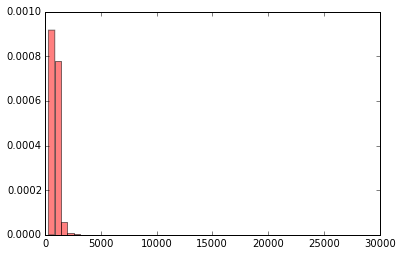

In [25]:
#task 1 histogram
# the histogram of the task1 RTs
plt.hist(task1RT, numbins, normed=True, facecolor='r', alpha=0.5)
plt.show()

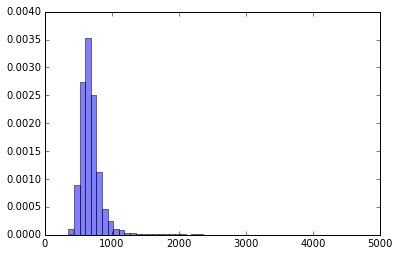

In [26]:
#task 2 histogram

# the histogram of the task2 RTs
plt.hist(task2RT, numbins, normed=True, facecolor='b', alpha=0.5)
plt.show()

### Scatterplot

Now make a scatterplot that has the first 1000 elements form `task1RT` on the x axis, and the first 1000 elments of `task2RT` on the y axis. 

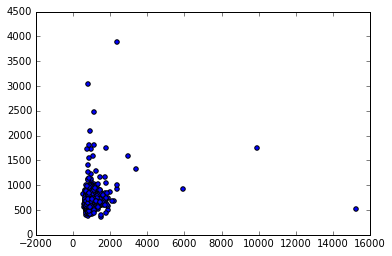

In [27]:
# task1-task2 scatterplot here

plt.scatter(task1RT[:1000],task2RT[:1000])
plt.show()

Now use the `np.mean` function to compute the mean of `task1RT` and `task2RT`. Save the result into a little list with 2 elements: the mean of the task1RT, then the mean of the task2RT

In [28]:
task1mean = np.mean(task1RT)
task2mean = np.mean(task2RT)

means = [task1mean, task2mean]

### Bar Plot

Finally, make a bar plot that plots both of the means. Make sure you label your x-axis with "Task 1" and "Task2", and make the bars green. Also make sure there is space inside the plot area (you don't want your bars touching any of the edges). 

Which task has higher RTs (i.e., slower responses)?

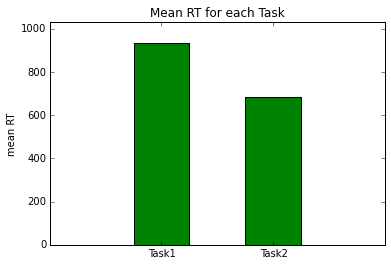

In [29]:
xdata = [1,2] #arbitrary! Just need 2 numbers
ydata = means
width = 0.5

fig, ax = plt.subplots() #create 1 blank plot
ax.bar(xdata,ydata,width,color='g',align='center') #create the bar plot
ax.axis([0,3,0,max(means)+100]) #change the axis limits

#change some of the labels
ax.set_ylabel('mean RT')
ax.set_title('Mean RT for each Task')
ax.set_xticks(xdata)
ax.set_xticklabels(('Task1','Task2'))

plt.show()